In [1]:
import pickle
from collections import OrderedDict
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# reads 3 pickle files for different seeds (now all set to 42 for testing)
seed_nums = [20, 10, 0]

D = []
for n in seed_nums: 
    with open('word_order_results_seed_{}.pickle'.format(n), 'rb') as handle:
        r = pickle.load(handle)
        D.append(r)


# mean and std data
test_acc_means = []
test_acc_stds = []
model_names =  []

# sentence length data
sl_data = []
for model in D[0].keys():
    
    # change model names and skip LSTMClassifier 
    if model == 'LSTMClassifier':
        continue
    if model == 'LSTMClassifier_mb':
        model_names.append('LSTM')
    else:
        model_names.append(model)
        
        
    test_accs = np.array([D[0][model]['test_accuracy'], 
                          D[1][model]['test_accuracy'], 
                          D[2][model]['test_accuracy']])
    test_acc_mean = np.mean(test_accs)
    test_acc_sd = np.std(test_accs)
    test_acc_means.append(test_acc_mean)
    test_acc_stds.append(test_acc_sd)
    
    print(model,'- acc:', test_acc_mean,'- sd:', test_acc_sd)

    

BOW - acc: 0.2809954751131221 - sd: 0.014053883927959159
CBOW - acc: 0.36184012066365007 - sd: 0.012377217640379272
Deep_CBOW - acc: 0.3728506787330317 - sd: 0.010475870500262637
PT_Deep_CBOW - acc: 0.42473604826546 - sd: 0.005607128294250715
LSTMClassifier_mb - acc: 0.455052790346908 - sd: 0.003227893598647454


Populating the interactive namespace from numpy and matplotlib


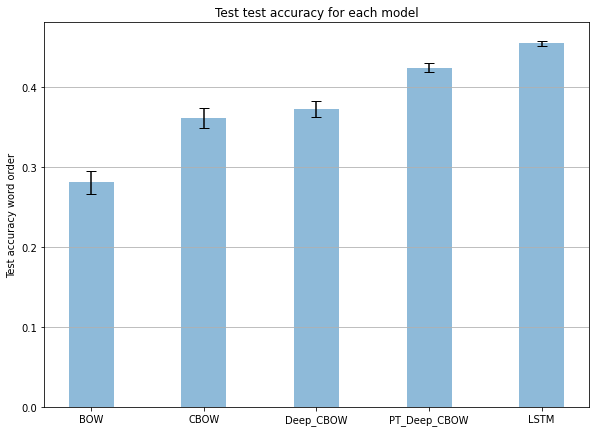

In [2]:
%pylab inline
plt.rcParams["figure.figsize"] = [15,7]

# plot the accuracies for the standard models
# barplot with standard deviation
x_pos = np.arange(len(model_names))
fig, ax = plt.subplots()
ax.bar(x_pos[0:6], test_acc_means[0:6], yerr=test_acc_stds[0:6],  width=0.4, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Test accuracy word order')
ax.set_xticks(x_pos[0:6])
ax.set_xticklabels(model_names[0:6])
ax.set_title('Test test accuracy for each model')
ax.yaxis.grid(True)
plt.tight_layout()
fig.set_size_inches(8, 6)
# Save the figure and show
plt.savefig('plots/accuracies_word_order.png')
plt.show()
